In [1]:
# import

from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
# Constants

INITIAL_FILENAME='data/initial/Life Expectancy Data.csv'
PREPARATION_PATH='data/preparation/'
PROCESSED_FILENAME=PREPARATION_PATH + 'Life Expectancy Data Processed.csv'

In [3]:
# load

df = pd.read_csv(INITIAL_FILENAME)

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
scaled_df = df.copy()
scaler = MinMaxScaler()
numerical_columns = scaled_df.select_dtypes(include=['int64', 'float64']).columns
scaled_df[numerical_columns] = scaler.fit_transform(scaled_df[numerical_columns])
correlation = scaled_df[numerical_columns].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5)
plt.title('Correlation Matrix for Dataset')
plt.savefig(PREPARATION_PATH + 'correlation_matrix.png')
plt.close()

plt.figure(figsize=(16, 16))
sns.heatmap(np.abs(correlation), annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5)
plt.title('Magnitude of Correlation Matrix for Dataset')
plt.savefig(PREPARATION_PATH + 'correlation_matrix_magnitude.png')
plt.close()

correlation

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


## Remarks about correlation

To keep columns closer to linearly independent, I have identified the following columns as redundant:

1. Schooling - Income composition of resources and schooling are tightly related. Given that higher income tends to lead to higher levels of education, I will forego the use of schooling.
2. Percentage expenditure - GDP and Percentage expenditure are naturally tightly coupled. GDP seems the natural feature to work with.
3. Infant deaths - Under 5 deaths and infant deaths say nearly the same thing but under 5 is more fine-grain. For that reason I am keeping under 5.
4. Adult mortality - Adult is conceptually very tightly coupled to life expectancy, so to arrive at a result that is not overfitting to mortality I am removing this column.
5. Year - year appears to be pretty unrelated to the rest of the data
6. Country - the country is a good way to categorize for a human, but other statistics will prove more useful at modeling

In [6]:
# Removing correlated columns

columns_to_remove = [
    'Schooling',
    'percentage expenditure',
    'infant deaths',
    'Adult Mortality',
    'Year',
    'Country'
]

df = df[[col for col in df.columns if col not in columns_to_remove]]

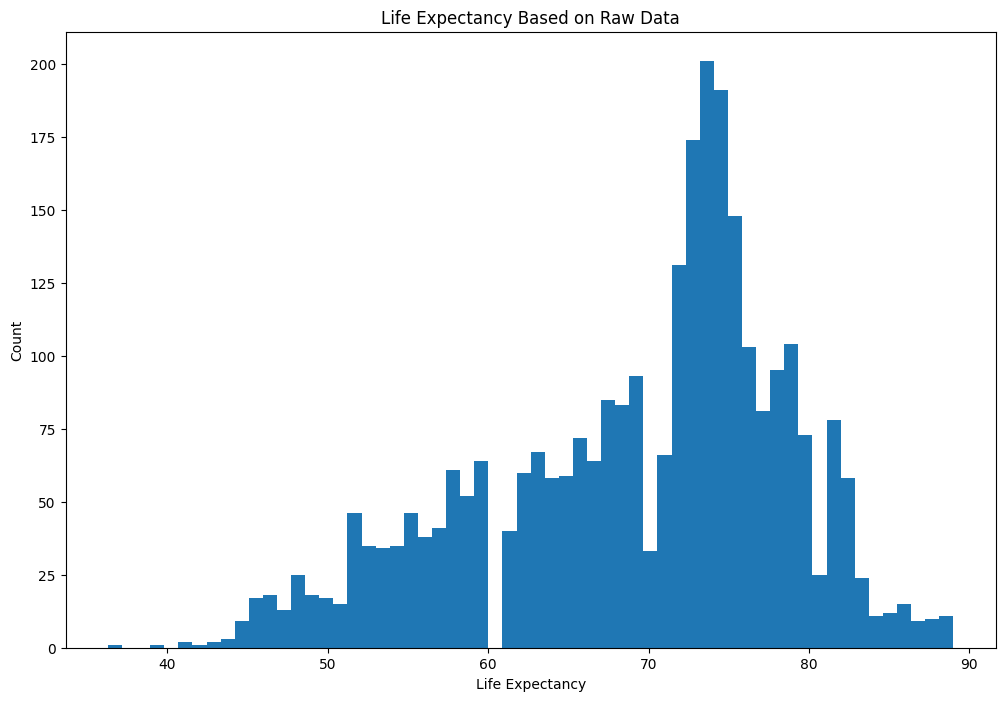

In [7]:
plt.figure(figsize=(12,8))
plt.hist(df.loc[:, 'Life expectancy '], bins=60)
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.title('Life Expectancy Based on Raw Data')
plt.savefig(PREPARATION_PATH + 'Life expectancy, raw.png')
plt.show()

In [8]:
# Scale data in a way that is generalized for reasonable values outside of the given data
for column in df.select_dtypes(['int64', 'float64']).columns:
    if column == 'Life expectancy ':
        continue
    std = df[column].std()
    mn = max(df[column].mean() - 2 * std, 0)
    mx = df[column].mean() + 2 * std
    df[column] = (df[column] - mn) / (mx - mn)

In [9]:
# encode categories

dummies = pd.get_dummies(df[df.select_dtypes(['object']).columns], drop_first=True)

df = df[[col for col in df.columns if col not in df[df.select_dtypes(['object']).columns]]]
df = pd.concat([df, dummies], axis=1)


In [10]:
# remove NaNs

df.dropna(inplace=True)
df.head()

,Life expectancy,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Status_Developing
0,65.0,0.000787,0.341041,0.045515,0.243594,0.228696,-0.316865,0.722330,0.317387,0.008405,0.016219,0.250312,1.257301,1.245672,0.323911,True
1,59.9,0.000787,0.311124,0.019405,0.237217,0.236962,0.238026,0.724332,0.285764,0.008405,0.017008,0.002431,1.279231,1.260073,0.320355,True
2,59.9,0.000787,0.331069,0.016960,0.230840,0.245228,0.280710,0.719328,0.306846,0.008405,0.017537,0.235437,1.293851,1.274474,0.313243,True
3,59.5,0.000787,0.360985,0.109923,0.224463,0.256250,0.334064,0.758355,0.338469,0.008405,0.018598,0.027430,1.308471,1.296075,0.304945,True
4,59.2,0.000787,0.370957,0.118837,0.219362,0.267272,0.344735,0.693311,0.349010,0.008405,0.001764,0.022100,1.330400,1.310476,0.294277,True


In [11]:
df.to_csv(PROCESSED_FILENAME, index=False)